### Выполнил: Грудинин Михаил 23Б16

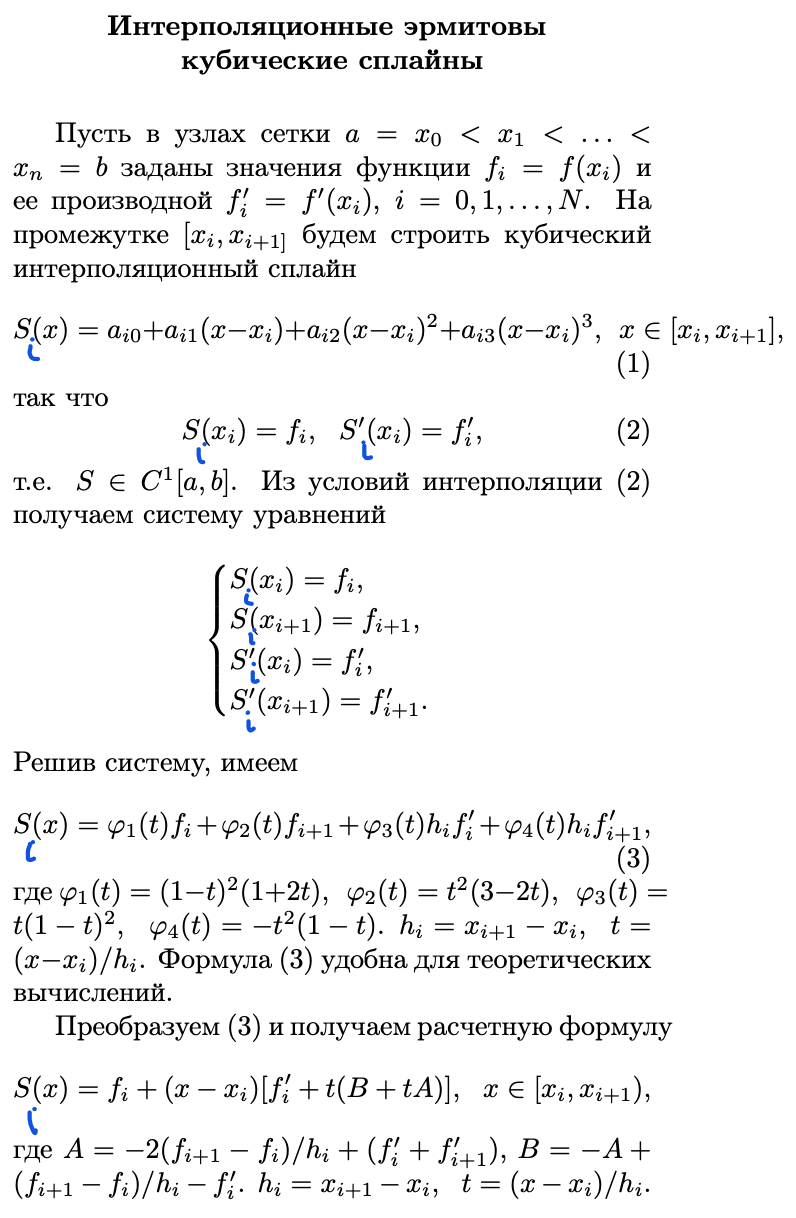

### Задача: Построить кубический эрмитов сплайн по значениям функции $ f(x) = \frac{1}{1 + 25x^2} $ в узлах равномерной сетки узлов {$ {x_i} $} с шагом h: $ {x_i} $ = $ {h_i} $, i = 1,...,n, n = 5.

Импортируем необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.interpolate import CubicHermiteSpline


Задаем функцию и её производную

In [2]:
def f(x):
    return 1 / (1 + 25 * x**2)

def f_prime(x):
    return -50 * x / (1 + 25 * x**2)**2

Задаем количество узлов

In [3]:
n = 5

Задаем равномерную сетку узлов

In [4]:
x_nodes = np.linspace(-1, 1, n)
y_nodes = f(x_nodes)
y_prime_nodes = f_prime(x_nodes)

In [5]:
print(x_nodes)
print(y_nodes)
print(y_prime_nodes)

[-1.  -0.5  0.   0.5  1. ]
[0.03846154 0.13793103 1.         0.13793103 0.03846154]
[ 0.0739645   0.47562426 -0.         -0.47562426 -0.0739645 ]


Создаем кубический эрмитов сплайн

Можем воспользоваться библиоеткой scipy:
```Python
from scipy.interpolate import CubicHermiteSpline
...
spline = CubicHermiteSpline(x_nodes, y_nodes, y_prime_nodes)
...
spline_values = spline(x_values)
```

Либо реализовать функцию самостоятельно:

In [6]:
# spline = CubicHermiteSpline(x_nodes, y_nodes, y_prime_nodes)

def cubic_hermite_spline(x, x_nodes, y_nodes, y_prime_nodes):
    h = np.diff(x_nodes) # вычисляем разности между соседними элементами массива x_nodes. Это даёт шаги h_i​ между узлами. В случае равномерной сетки, все h_i будут одинаковыми.
    spline_values = np.zeros_like(x) # создаем массив spline_values той же формы, что и x, и заполняем его нулями. Этот массив будет использоваться для хранения значений сплайна в каждом из точек x.
    
    for i in range(len(x_nodes) - 1): # создаем логический массив mask, который указывает, какие значения x попадают в текущий интервал [x_nodes[i], x_nodes[i + 1]].
        mask = (x >= x_nodes[i]) & (x <= x_nodes[i + 1]) # проверяем, есть ли хотя бы одно значение x, которое попадает в текущий интервал. Если да, то продолжаем вычисления для этого интервала.
        if np.any(mask):
            xi = x_nodes[i]
            xi1 = x_nodes[i + 1]
            fi = y_nodes[i]
            fi1 = y_nodes[i + 1]
            fpi = y_prime_nodes[i]
            fp1i = y_prime_nodes[i + 1]
            
            t = (x[mask] - xi) / h[i]
            A = -2 * (fi1 - fi) / h[i] + fpi + fp1i
            B = -A + (fi1 - fi) / h[i] - fpi
            
            spline_values[mask] = fi + (x[mask] - xi) * (fpi + t * (B + t * A))
    
    return spline_values

Генерируем значения для отображения сплайна и исходной функции

In [7]:
x_values = np.linspace(-1, 1, 100)
# spline_values = spline(x_values)
spline_values = cubic_hermite_spline(x_values, x_nodes, y_nodes, y_prime_nodes)
true_values = f(x_values)

Вычисляем разницу между аппроксимацией и точными значениями

In [8]:
difference = spline_values - true_values

График сплайна и исходной функции

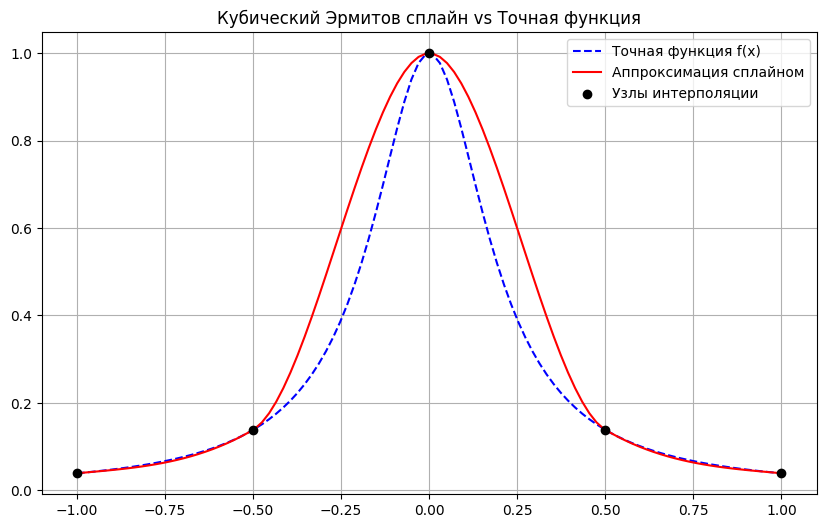

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, true_values, label="Точная функция f(x)", color="blue", linestyle="--")
plt.plot(x_values, spline_values, label="Аппроксимация сплайном", color="red")
plt.scatter(x_nodes, y_nodes, label="Узлы интерполяции", color="black", zorder=5)
plt.title("Кубический Эрмитов сплайн vs Точная функция")
plt.legend()
plt.grid(True)
plt.show()

График разницы между сплайном и точной функцией

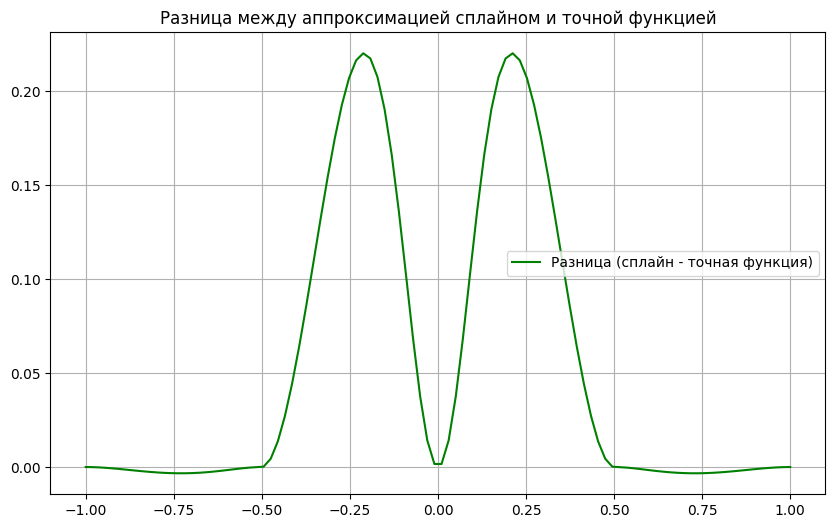

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, difference, label="Разница (сплайн - точная функция)", color="green")
plt.title("Разница между аппроксимацией сплайном и точной функцией")
plt.legend()
plt.grid(True)
plt.show()